In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#we want to create a neural network, so we need to import the keras library
from keras.models import Sequential
import tensorflow as tf
from sklearn.ensemble import IsolationForest

In [2]:
csv_file = "2500-40000K_with_metallicity.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
bp_rp = df['bp_rp']
bp_g = df['bp_g']
g_rp = df['g_rp']

# Effective temperature of star
temperature = df['teff_gspphot']
metallicity = df['mh_gspphot']

color_filters_df = pd.DataFrame()
color_filters_df['bp_rp'] = bp_rp
color_filters_df['bp_g'] = bp_g
color_filters_df['g_rp'] = g_rp

# Effective temperature of star
color_filters_df['temperature'] = df['teff_gspphot']
color_filters_df['metallicity'] = df['mh_gspphot']
print(color_filters_df.shape)

(317213, 5)


In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming color_filters_df is your DataFrame with temperature and metallicity columns

# Create an empty DataFrame to store results
filtered_dataframes = []

# Iterate over temperature range with steps of 500
for temperature in range(2500, 40000, 500):
    # Filter data for the current temperature
    temp_filtered_df = color_filters_df[(color_filters_df['temperature'] >= temperature) & 
                                         (color_filters_df['temperature'] < temperature + 500)].copy()

    # Create and fit the Isolation Forest model
    isoforest = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.1, max_features=1.0)
    isoforest.fit(temp_filtered_df[["bp_rp"]])

    # Prediction
    temp_filtered_df['anomalies_scores'] = isoforest.decision_function(temp_filtered_df[["bp_rp"]])
    temp_filtered_df['anomaly'] = isoforest.predict(temp_filtered_df[["bp_rp"]])

    # Filter out anomalies
    temp_filtered_df = temp_filtered_df[temp_filtered_df['anomaly'] == 1]

    # Append the filtered DataFrame to the list
    filtered_dataframes.append(temp_filtered_df)

# Concatenate all the filtered DataFrames
result_df = pd.concat(filtered_dataframes, ignore_index=True)
color_filters_df = result_df

# Create an empty DataFrame to store results
filtered_dataframes = []

# Iterate over temperature range with steps of 500
for temperature in range(2500, 40000, 500):
    # Filter data for the current temperature
    temp_filtered_df = color_filters_df[(color_filters_df['temperature'] >= temperature) & 
                                         (color_filters_df['temperature'] < temperature + 500)].copy()

    # Create and fit the Isolation Forest model
    isoforest = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.1, max_features=1.0)
    isoforest.fit(temp_filtered_df[["bp_g"]])

    # Prediction
    temp_filtered_df['anomalies_scores'] = isoforest.decision_function(temp_filtered_df[["bp_g"]])
    temp_filtered_df['anomaly'] = isoforest.predict(temp_filtered_df[["bp_g"]])

    # Filter out anomalies
    temp_filtered_df = temp_filtered_df[temp_filtered_df['anomaly'] == 1]

    # Append the filtered DataFrame to the list
    filtered_dataframes.append(temp_filtered_df)

# Concatenate all the filtered DataFrames
result_df = pd.concat(filtered_dataframes, ignore_index=True)
color_filters_df = result_df

# Create an empty DataFrame to store results
filtered_dataframes = []

# Iterate over temperature range with steps of 500
for temperature in range(2500, 40000, 500):
    # Filter data for the current temperature
    temp_filtered_df = color_filters_df[(color_filters_df['temperature'] >= temperature) & 
                                         (color_filters_df['temperature'] < temperature + 500)].copy()

    # Create and fit the Isolation Forest model
    isoforest = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.1, max_features=1.0)
    isoforest.fit(temp_filtered_df[["g_rp"]])

    # Prediction
    temp_filtered_df['anomalies_scores'] = isoforest.decision_function(temp_filtered_df[["g_rp"]])
    temp_filtered_df['anomaly'] = isoforest.predict(temp_filtered_df[["g_rp"]])

    # Filter out anomalies
    temp_filtered_df = temp_filtered_df[temp_filtered_df['anomaly'] == 1]

    # Append the filtered DataFrame to the list
    filtered_dataframes.append(temp_filtered_df)

# Concatenate all the filtered DataFrames
result_df = pd.concat(filtered_dataframes, ignore_index=True)
color_filters_df = result_df

# Create an empty DataFrame to store results
filtered_dataframes = []

# Iterate over temperature range with steps of 500
for temperature in range(2500, 40000, 500):
    # Filter data for the current temperature
    temp_filtered_df = color_filters_df[(color_filters_df['temperature'] >= temperature) & 
                                         (color_filters_df['temperature'] < temperature + 500)].copy()

    # Create and fit the Isolation Forest model
    isoforest = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.1, max_features=1.0)
    isoforest.fit(temp_filtered_df[["metallicity"]])

    # Prediction
    temp_filtered_df['anomalies_scores'] = isoforest.decision_function(temp_filtered_df[["metallicity"]])
    temp_filtered_df['anomaly'] = isoforest.predict(temp_filtered_df[["metallicity"]])

    # Filter out anomalies
    temp_filtered_df = temp_filtered_df[temp_filtered_df['anomaly'] == 1]

    # Append the filtered DataFrame to the list
    filtered_dataframes.append(temp_filtered_df)

# Concatenate all the filtered DataFrames
result_df = pd.concat(filtered_dataframes, ignore_index=True)
color_filters_df = result_df
print(color_filters_df.shape)


(208041, 7)


In [4]:
#the input of the model is the color indices, and the output is the temperature.
#lets perform this with a neural network
#we need to split the data into training and testing data
#we will use 80% of the data for training and 20% for testing
#we will also shuffle the data to avoid any bias

X = color_filters_df[['bp_rp', 'bp_g', 'g_rp', 'metallicity']].values
y = color_filters_df['temperature'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)), #change input shape based on how many u using
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  #1 neuron output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [6]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
4161/4161 [==============================] - 6s 1ms/step - loss: 48805536.0000 - mae: 4733.2109 - val_loss: 36663260.0000 - val_mae: 4058.8293
Epoch 2/20
4161/4161 [==============================] - 5s 1ms/step - loss: 35095768.0000 - mae: 3834.4678 - val_loss: 36625312.0000 - val_mae: 3792.1707
Epoch 3/20
4161/4161 [==============================] - 5s 1ms/step - loss: 33866856.0000 - mae: 3690.5293 - val_loss: 33437496.0000 - val_mae: 3666.9597
Epoch 4/20
4161/4161 [==============================] - 5s 1ms/step - loss: 32585182.0000 - mae: 3571.3193 - val_loss: 32235242.0000 - val_mae: 3555.5681
Epoch 5/20
4161/4161 [==============================] - 5s 1ms/step - loss: 31410234.0000 - mae: 3506.7708 - val_loss: 31146868.0000 - val_mae: 3464.7686
Epoch 6/20
4161/4161 [==============================] - 5s 1ms/step - loss: 30545640.0000 - mae: 3467.0869 - val_loss: 30298956.0000 - val_mae: 3461.5645
Epoch 7/20
4161/4161 [==============================] - 5s 1ms/step - loss: 

In [7]:
predictions = model.predict(X_test)

#assign max to a really low number
max = -10000000
#assign min to a really high number
min = 10000000

avg = 0

for i in range(len(X_test)):
    # print("Input:", X_test[i])
    #if actual output is greater than 250000, then pritn it
    if predictions[i][0] > 250000: # HAD y_test[i] == 4353
        print("Input:", X_train[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i][0])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
    #update max and min accordingly, based on difference in expected and actual output
    if abs(y_test[i] - predictions[i][0]) > max:
        max = abs(y_test[i] - predictions[i][0])
    if abs(y_test[i] - predictions[i][0]) < min:
        min = abs(y_test[i] - predictions[i][0])
    avg += abs(y_test[i] - predictions[i][0])
avg = avg / len(X_test)
# print(min, max, avg)

1301/1301 [==============================] - 1s 672us/step


In [8]:
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.6168581342981632


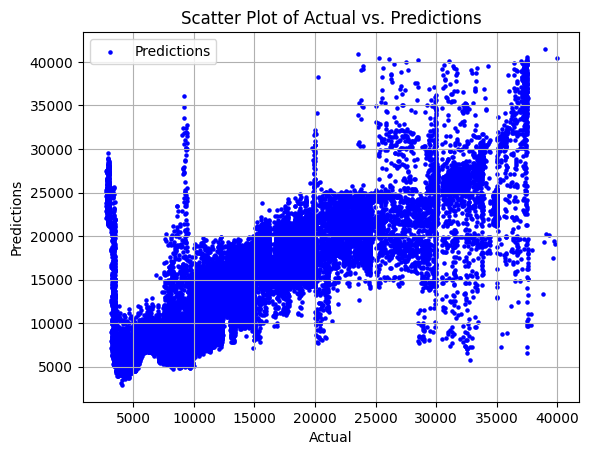

In [9]:
plt.scatter(y_test, predictions, c='b', marker='o', label='Predictions', s=5)  # Adjust the 's' parameter for dot size

# Add labels and a 1:1 line for reference
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.plot(color='red', linestyle='--', label='1:1 Line')

# Add a legend
plt.legend()

# Show the plot
plt.title("Scatter Plot of Actual vs. Predictions")
plt.grid(True)
plt.show()